In [2]:
# Dependencies for Weather
import requests as req
import openweathermapy.core as owm
from citipy import citipy
#Dependencies for random coordinates
import random
from random import uniform
#Dependencies for Df and Analysis
import numpy as np
import pandas as pd
#Dependencies for Plots
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
#Dependencies for api key
from config import api_key

In [3]:
#Define max value for the initial range and sample size
max_coord = 1500
sample = 500

In [4]:
#Generate random latitude coordinates with a function
def lat_coordinates():
    return random.uniform(-90,90)
random_lat_coord = [lat_coordinates() for latitude in range(max_coord)]
#random_lat_coord[0]
#Generate random longitude coordinates with a function
def long_coordinates():
    return random.uniform(-180,180)
random_long_coord = [long_coordinates() for longitude in range(max_coord)]
#random_long_coord[0]
#len(random_long_coord)
#len(random_lat_coord)

In [5]:
# Functions to remove duplicated elements.I decided not to use this here because of future merging problems in the DF
#test the function random_lat_coord = [2,2,3,4,4,8]
#def Remove(_):
    #latitude_coord = []
    #for coordenate in random_lat_coord:
        #if coordenate not in latitude_coord:
            #latitude_coord.append(coordenate)
    #return latitude_coord
#latitude = Remove(random_lat_coord)
#latitude

#def Remove(_):
    #longitude_coord = []
    #for coordenate in random_long_coord:
        #if coordenate not in longitude_coord:
            #longitude_coord.append(coordenate)
    #return longitude_coord
#longitude = Remove(random_lat_coord)
#longitude

In [6]:
#Rename the coordenates list 
latitude = random_lat_coord
longitude = random_long_coord

In [7]:
#Test the function to return city and country
#city= citipy.nearest_city(latitude[0],longitude[0])
#city
#city.city_name
#city.country_code

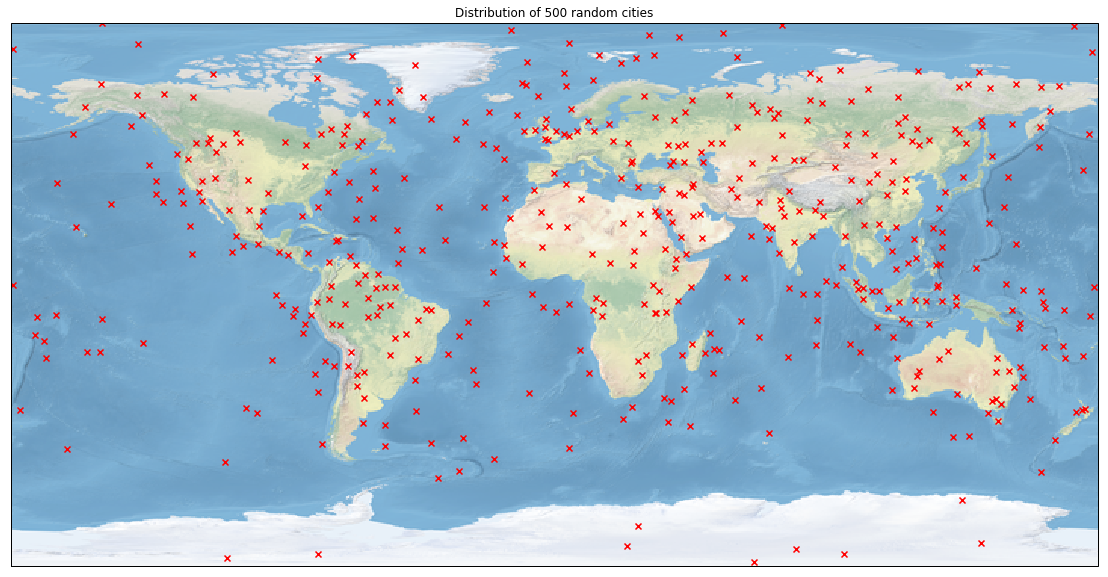

In [8]:
#Generate city names for the lat and long coordenates above
city_names = []
for x in range(0,max_coord):
    city_name = citipy.nearest_city(latitude[x],longitude[x])
    city_names.append(city_name)
#city_names

#Generate the city and country lists 
city_list = []
for x in range(0,max_coord):
    city = city_names[x].city_name
    #print(city_names[x].city_name)
    city_list.append(city)

country_list = []
for y in range(0,max_coord):
    country = city_names[y].country_code
    #print(city_names[y].country_code)
    country_list.append(country)

#Generate Dataframe
location_df = pd.DataFrame()

location_df["Latitude"] = ""
location_df["Longitude"] = ""
location_df['City'] = ''
location_df['Country Code'] = ''
location_df = location_df.append(pd.DataFrame.from_dict({"Latitude":latitude,"Longitude":longitude,"City":city_list,"Country Code":country_list,}))
location_df = location_df.reset_index(drop=True)
location_df.shape
#location_df

#Clean the data, drop the duplicated citites and reindex
drop_location_df = location_df.drop_duplicates(['City'])
drop_location_df.shape
new_location_df = drop_location_df.sample(sample)
city_coordinates_df = new_location_df.reset_index(drop=True)

#See the random coordenates in the map for the nearest cities:
import cartopy.crs as ccrs

fig, ax = plt.subplots(figsize = (20,10))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()

plt.scatter(list(city_coordinates_df['Longitude']),list(city_coordinates_df['Latitude']), color='red', marker = 'x', transform = ccrs.Geodetic(),)

plt.title('Distribution of 500 random cities')
plt.savefig('50 Cities in the world')
plt.show()

In [9]:
#Set the URL
url = "http://api.openweathermap.org/data/2.5/weather?"

#Set the parameters
units = 'imperial'
settings = {"units":"imperial", "appid" :api_key}

In [10]:
# Testing the api_key -> Get current weather for first city in the initial city list
try:
    current_weather = owm.get_current(city_list[0], **settings)
    print("Current temperature (F) for %s:" %(city_list[0]).capitalize())
    print(current_weather['main']['temp'])
except:
    print('HTTP Error: Not Found')

Current temperature (F) for Cururupu:
75.46


In [11]:
#city_coordinates_df.head()

In [ ]:
#Requesting weather data for all the cities in the list. I should iterate through all the list
for index, row in city_coordinates_df.iterrows():    
    
    #Set parameters for the query
    city = row['City']
    country = row['Country Code']
    settings['q'] =f"{city},{country}"
    
    #Query the url
    #query_url = "%s%sappid=%s&units=%s&q="%(url,api_key,units,city)
    query_url = f"{url}appid={api_key}&units={units}&q="
    
    # Request information to the endpoint and prit response
    print(f"Retrieve Weather Parameters for: {settings['q']}")
    WeatherPy_response = req.get(query_url + city)
    print(WeatherPy_response.url)
    
    #Create json response
    WeatherPy_response  = WeatherPy_response.json()
    
    #Set values for Temperature, Humidity, Cloudiness, Wind Speed, Latitude and Longitude
    city_coordinates_df.set_value(index,"Temperature",WeatherPy_response.get("main",{}).get("temp_max"))
    city_coordinates_df.set_value(index,"Humidity",WeatherPy_response.get("main",{}).get("humidity"))
    city_coordinates_df.set_value(index,"Cloudiness",WeatherPy_response.get("clouds",{}).get("all"))
    city_coordinates_df.set_value(index,"Wind Speed",WeatherPy_response.get("wind",{}).get("speed"))
    city_coordinates_df.set_value(index,"Latitude",WeatherPy_response.get("coord",{}).get("lat"))
    city_coordinates_df.set_value(index,"Longitude",WeatherPy_response.get("coord",{}).get("lon"))
    

Retrieve Weather Parameters for: bubaque,gw
http://api.openweathermap.org/data/2.5/weather?appid=17fecf0e16c0b9b7cc36e73b9d35a158&units=imperial&q=bubaque
Retrieve Weather Parameters for: tasbuget,kz
http://api.openweathermap.org/data/2.5/weather?appid=17fecf0e16c0b9b7cc36e73b9d35a158&units=imperial&q=tasbuget
Retrieve Weather Parameters for: vila velha,br
http://api.openweathermap.org/data/2.5/weather?appid=17fecf0e16c0b9b7cc36e73b9d35a158&units=imperial&q=vila%20velha
Retrieve Weather Parameters for: cherskiy,ru
http://api.openweathermap.org/data/2.5/weather?appid=17fecf0e16c0b9b7cc36e73b9d35a158&units=imperial&q=cherskiy
Retrieve Weather Parameters for: dikson,ru
http://api.openweathermap.org/data/2.5/weather?appid=17fecf0e16c0b9b7cc36e73b9d35a158&units=imperial&q=dikson
Retrieve Weather Parameters for: castro,cl
http://api.openweathermap.org/data/2.5/weather?appid=17fecf0e16c0b9b7cc36e73b9d35a158&units=imperial&q=castro
Retrieve Weather Parameters for: rocha,uy
http://api.openweath

http://api.openweathermap.org/data/2.5/weather?appid=17fecf0e16c0b9b7cc36e73b9d35a158&units=imperial&q=bandarbeyla
Retrieve Weather Parameters for: kropotkin,ru
http://api.openweathermap.org/data/2.5/weather?appid=17fecf0e16c0b9b7cc36e73b9d35a158&units=imperial&q=kropotkin
Retrieve Weather Parameters for: calama,cl
http://api.openweathermap.org/data/2.5/weather?appid=17fecf0e16c0b9b7cc36e73b9d35a158&units=imperial&q=calama
Retrieve Weather Parameters for: sambava,mg
http://api.openweathermap.org/data/2.5/weather?appid=17fecf0e16c0b9b7cc36e73b9d35a158&units=imperial&q=sambava
Retrieve Weather Parameters for: hambantota,lk
http://api.openweathermap.org/data/2.5/weather?appid=17fecf0e16c0b9b7cc36e73b9d35a158&units=imperial&q=hambantota
Retrieve Weather Parameters for: tigzirt,dz
http://api.openweathermap.org/data/2.5/weather?appid=17fecf0e16c0b9b7cc36e73b9d35a158&units=imperial&q=tigzirt
Retrieve Weather Parameters for: saryshagan,kz
http://api.openweathermap.org/data/2.5/weather?appid=17

http://api.openweathermap.org/data/2.5/weather?appid=17fecf0e16c0b9b7cc36e73b9d35a158&units=imperial&q=batagay
Retrieve Weather Parameters for: canico,pt
http://api.openweathermap.org/data/2.5/weather?appid=17fecf0e16c0b9b7cc36e73b9d35a158&units=imperial&q=canico
Retrieve Weather Parameters for: hasaki,jp
http://api.openweathermap.org/data/2.5/weather?appid=17fecf0e16c0b9b7cc36e73b9d35a158&units=imperial&q=hasaki
Retrieve Weather Parameters for: hirara,jp
http://api.openweathermap.org/data/2.5/weather?appid=17fecf0e16c0b9b7cc36e73b9d35a158&units=imperial&q=hirara
Retrieve Weather Parameters for: luderitz,na
http://api.openweathermap.org/data/2.5/weather?appid=17fecf0e16c0b9b7cc36e73b9d35a158&units=imperial&q=luderitz
Retrieve Weather Parameters for: challapata,bo
http://api.openweathermap.org/data/2.5/weather?appid=17fecf0e16c0b9b7cc36e73b9d35a158&units=imperial&q=challapata
Retrieve Weather Parameters for: krasnoselkup,ru
http://api.openweathermap.org/data/2.5/weather?appid=17fecf0e16

http://api.openweathermap.org/data/2.5/weather?appid=17fecf0e16c0b9b7cc36e73b9d35a158&units=imperial&q=sitka
Retrieve Weather Parameters for: gaspe,ca
http://api.openweathermap.org/data/2.5/weather?appid=17fecf0e16c0b9b7cc36e73b9d35a158&units=imperial&q=gaspe
Retrieve Weather Parameters for: nueva concepcion,gt
http://api.openweathermap.org/data/2.5/weather?appid=17fecf0e16c0b9b7cc36e73b9d35a158&units=imperial&q=nueva%20concepcion
Retrieve Weather Parameters for: yellowknife,ca
http://api.openweathermap.org/data/2.5/weather?appid=17fecf0e16c0b9b7cc36e73b9d35a158&units=imperial&q=yellowknife
Retrieve Weather Parameters for: omboue,ga
http://api.openweathermap.org/data/2.5/weather?appid=17fecf0e16c0b9b7cc36e73b9d35a158&units=imperial&q=omboue
Retrieve Weather Parameters for: redmond,us
http://api.openweathermap.org/data/2.5/weather?appid=17fecf0e16c0b9b7cc36e73b9d35a158&units=imperial&q=redmond
Retrieve Weather Parameters for: paamiut,gl
http://api.openweathermap.org/data/2.5/weather?app

http://api.openweathermap.org/data/2.5/weather?appid=17fecf0e16c0b9b7cc36e73b9d35a158&units=imperial&q=helena
Retrieve Weather Parameters for: trowbridge,gb
http://api.openweathermap.org/data/2.5/weather?appid=17fecf0e16c0b9b7cc36e73b9d35a158&units=imperial&q=trowbridge
Retrieve Weather Parameters for: tadine,nc
http://api.openweathermap.org/data/2.5/weather?appid=17fecf0e16c0b9b7cc36e73b9d35a158&units=imperial&q=tadine
Retrieve Weather Parameters for: borova,ua
http://api.openweathermap.org/data/2.5/weather?appid=17fecf0e16c0b9b7cc36e73b9d35a158&units=imperial&q=borova
Retrieve Weather Parameters for: chapais,ca
http://api.openweathermap.org/data/2.5/weather?appid=17fecf0e16c0b9b7cc36e73b9d35a158&units=imperial&q=chapais
Retrieve Weather Parameters for: high rock,bs
http://api.openweathermap.org/data/2.5/weather?appid=17fecf0e16c0b9b7cc36e73b9d35a158&units=imperial&q=high%20rock
Retrieve Weather Parameters for: srednekolymsk,ru
http://api.openweathermap.org/data/2.5/weather?appid=17fe

http://api.openweathermap.org/data/2.5/weather?appid=17fecf0e16c0b9b7cc36e73b9d35a158&units=imperial&q=villa%20carlos%20paz
Retrieve Weather Parameters for: bom jesus,br
http://api.openweathermap.org/data/2.5/weather?appid=17fecf0e16c0b9b7cc36e73b9d35a158&units=imperial&q=bom%20jesus
Retrieve Weather Parameters for: bathsheba,bb
http://api.openweathermap.org/data/2.5/weather?appid=17fecf0e16c0b9b7cc36e73b9d35a158&units=imperial&q=bathsheba
Retrieve Weather Parameters for: port elizabeth,za
http://api.openweathermap.org/data/2.5/weather?appid=17fecf0e16c0b9b7cc36e73b9d35a158&units=imperial&q=port%20elizabeth
Retrieve Weather Parameters for: leningradskiy,ru
http://api.openweathermap.org/data/2.5/weather?appid=17fecf0e16c0b9b7cc36e73b9d35a158&units=imperial&q=leningradskiy
Retrieve Weather Parameters for: sol-iletsk,ru
http://api.openweathermap.org/data/2.5/weather?appid=17fecf0e16c0b9b7cc36e73b9d35a158&units=imperial&q=sol-iletsk
Retrieve Weather Parameters for: kota kinabalu,my
http://

http://api.openweathermap.org/data/2.5/weather?appid=17fecf0e16c0b9b7cc36e73b9d35a158&units=imperial&q=olinda
Retrieve Weather Parameters for: bredasdorp,za
http://api.openweathermap.org/data/2.5/weather?appid=17fecf0e16c0b9b7cc36e73b9d35a158&units=imperial&q=bredasdorp
Retrieve Weather Parameters for: talnakh,ru
http://api.openweathermap.org/data/2.5/weather?appid=17fecf0e16c0b9b7cc36e73b9d35a158&units=imperial&q=talnakh
Retrieve Weather Parameters for: panjwin,iq
http://api.openweathermap.org/data/2.5/weather?appid=17fecf0e16c0b9b7cc36e73b9d35a158&units=imperial&q=panjwin
Retrieve Weather Parameters for: krasnyy yar,ru
http://api.openweathermap.org/data/2.5/weather?appid=17fecf0e16c0b9b7cc36e73b9d35a158&units=imperial&q=krasnyy%20yar
Retrieve Weather Parameters for: tucuman,ar
http://api.openweathermap.org/data/2.5/weather?appid=17fecf0e16c0b9b7cc36e73b9d35a158&units=imperial&q=tucuman
Retrieve Weather Parameters for: sawai madhopur,in
http://api.openweathermap.org/data/2.5/weather?a

In [ ]:
#Exception Handling
# What should I do if I can't retrieve information ....Drop na's cities.
city_coordinates_df2 = city_coordinates_df.dropna()

initial_df_sz= city_coordinates_df.shape[0]
final_df_sz= city_coordinates_df2.shape[0]

if initial_df_sz > final_df_sz:
    print("Oops, we couldn't retrieve the weather parameters for (%s) cities" %(initial_df_sz - final_df_sz))
    print("Your new DataFrame has the weather information for (%s) unique cities"%(final_df_sz))
    print('The DataFrame has been saved as WeatherPy2.csv')
    city_coordinates_df2.to_csv("WeatherPy2.csv")
else:
    print("We succesfully retrieve the weather information for all the random cities sample you requested")
    print('The DataFrame has been saved as WeatherPy.csv')
    city_coordinates_df2.to_csv("WeatherPy.csv")

In [ ]:
city_coordinates_df2

In [ ]:
print('----------1. Latitude vs Longitude Scatterplot----------')
# Temperature vs Latitude 

#Build a scatter plot for Latitude vs. Temperature

plt.scatter(city_coordinates_df2["Longitude"], 
            city_coordinates_df2["Latitude"], c=city_coordinates_df2["Latitude"],
            edgecolor="black", linewidths=1, marker="o",
            cmap='GnBu', alpha=0.8)

plt.title('Latitude vs Longitude')
#plt.suptitle('Total cities plotted = %s'%(final_df_sz))
plt.ylim(-180, 180)
plt.xlim(-90, 90)
plt.savefig("=Latitude vs Longitude.png")
plt.show()

----------1. Temperature vs. Latitude Scatterplot----------


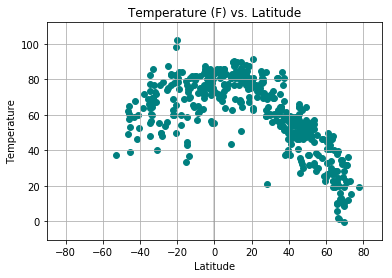

In [41]:
print('----------1. Temperature vs. Latitude Scatterplot----------')
# Temperature vs Latitude 
city_coordinates_df2.plot(kind="scatter",x="Latitude",y="Temperature",s=35, marker = 'o', color = 'teal', grid=True)
plt.title('Temperature (F) vs. Latitude')
#plt.suptitle('Total cities plotted = %s'%(final_df_sz))
plt.ylim(city_coordinates_df2['Temperature'].min() - 10, 10 + city_coordinates_df2['Temperature'].max())
plt.xlim(-90, 90)
plt.axvline(0, color='gray',alpha=0.4)
plt.savefig("Temperature vs. Latitude.png")
plt.show()

----------2. Humidity vs. Latitude Scatterplot----------


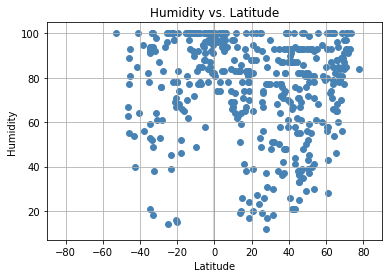

In [34]:
print('----------2. Humidity vs. Latitude Scatterplot----------')
# Temperature vs Latitude 
city_coordinates_df2.plot(kind="scatter",x="Latitude",y="Humidity",s=35, marker = 'o', color = 'steelblue', grid=True)
plt.title('Humidity vs. Latitude')
#plt.suptitle('Total cities plotted = %s'%(final_df_sz))
plt.ylim(city_coordinates_df2['Humidity'].min() - 5, 5 + city_coordinates_df2['Humidity'].max())
plt.xlim(-90, 90)
plt.axvline(0, color='gray',alpha=0.4)
plt.savefig("Humidity vs. Latitude.png")
plt.show()

----------3. Cloudiness vs. Latitude Scatterplot----------


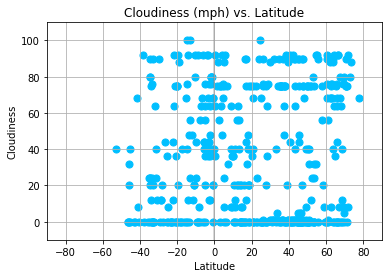

In [46]:
print('----------3. Cloudiness vs. Latitude Scatterplot----------')
# Temperature vs Latitude 
city_coordinates_df2.plot(kind="scatter",x="Latitude",y="Cloudiness",s=50, marker = 'o', color = 'deepskyblue', grid=True)
plt.title('Cloudiness (mph) vs. Latitude')
#plt.suptitle('Total cities plotted = %s'%(final_df_sz))
plt.ylim(city_coordinates_df2['Cloudiness'].min() - 10, 10 + city_coordinates_df2['Cloudiness'].max())
plt.xlim(-90, 90)
plt.axvline(0, color='gray',alpha=0.4)
plt.savefig("Cloudiness vs. Latitude.png")
plt.show()

----------4. Wind Speed vs. Latitude Scatterplot----------


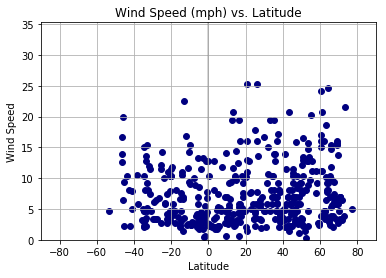

In [45]:
print('----------4. Wind Speed vs. Latitude Scatterplot----------')
# Temperature vs Latitude 
city_coordinates_df2.plot(kind="scatter",x="Latitude",y="Wind Speed",s=35, marker = 'o', color = 'navy', grid=True)
plt.title('Wind Speed (mph) vs. Latitude')
#plt.suptitle('Total cities plotted = %s'%(final_df_sz))
plt.ylim(0, 10 + city_coordinates_df2['Wind Speed'].max())
plt.xlim(-90, 90)
plt.axvline(0, color='gray',alpha=0.4)
plt.savefig("Wind Speed vs. Latitude.png")
plt.show()

In [26]:
print('Observable Trends')
print('1.The temperature increases as coordinates get closer to the equator. The cities around the equator have the highest temperatures')
max_wind = city_coordinates_df2.loc[city_coordinates_df2['Wind Speed'] == city_coordinates_df2['Wind Speed'].max()]
max_wind['City']
max_wind['Country Code']
print('2.The wind speed for most of the cities is under 10 mph. The median is %smph. There is a possible outlier with a wind speed of %smph in %s'%(city_coordinates_df2['Wind Speed'].median(),city_coordinates_df2['Wind Speed'].max(),'Pahrump in the US'))
print('3. The clouds seem pretty disperse, whithout a visible correlation with the latitude.')


Observable Trends
1.The temperature increases as coordinates get closer to the equator. The cities around the equator have the highest temperatures
2.The wind speed for most of the cities is under 10 mph. The median is 6.22mph. There is a possible outlier with a wind speed of 39.15mph in Pahrump in the US
3. The clouds seem pretty disperse, whithout a visible correlation with the latitude.
